In [1]:
#feature scalling is only used in numerical data set after data cleaning

In [2]:
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [3]:
# loading using seaborn ----
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df2=df[['survived','pclass','age','parch']]
df2.head()

,survived,pclass,age,parch
0,0,3,22.0,0
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,0


In [6]:
df3=df2.fillna(df2.mean())

In [7]:
X=df3.drop('survived',axis=1)
y=df3['survived']

In [8]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:
# we feed standardscaler only X_train dataset return mean and standard deviation . 

sc=StandardScaler()
sc.fit(X_train)

StandardScaler()

In [16]:
sc.mean_

array([ 2.31741573, 29.73606122,  0.39185393])

In [17]:
sc.scale_

array([ 0.8331813 , 13.08027558,  0.82079089])

In [20]:
X_train.describe()

,pclass,age,parch
count,712.000000,712.000000,712.000000
mean,2.317416,29.736061,0.391854
std,0.833767,13.089471,0.821368
min,1.000000,0.670000,0.000000
25%,2.000000,22.000000,0.000000
50%,3.000000,29.699118,0.000000
75%,3.000000,35.000000,0.000000
max,3.000000,80.000000,6.000000


In [21]:
X_train_sc=sc.transform(X_train)
X_test_sc=sc.transform(X_test)

In [23]:
X_train_sc

array([[ 0.81925059, -0.00282437,  1.95926403],
       [-0.38096838,  0.09662937, -0.47741019],
       [-0.38096838,  0.09662937,  0.74092692],
       ...,
       [ 0.81925059, -0.00282437, -0.47741019],
       [ 0.81925059,  0.47888431, -0.47741019],
       [-0.38096838,  2.31370804,  0.74092692]])

In [24]:
X_train_sc=pd.DataFrame(X_train_sc,columns=['pclass','age','parch'])
X_test_sc=pd.DataFrame(X_test_sc,columns=['pclass','age','parch'])

In [25]:
X_train_sc.head()

,pclass,age,parch
0,0.819251,-0.002824,1.959264
1,-0.380968,0.096629,-0.477410
2,-0.380968,0.096629,0.740927
3,0.819251,-0.744332,-0.477410
4,0.819251,-0.667881,-0.477410


In [26]:
X_train_sc.describe()

,pclass,age,parch
count,7.120000e+02,7.120000e+02,7.120000e+02
mean,-7.445667e-17,-4.359808e-16,-4.339537e-16
std,1.000703e+00,1.000703e+00,1.000703e+00
min,-1.581187e+00,-2.222129e+00,-4.774102e-01
25%,-3.809684e-01,-5.914295e-01,-4.774102e-01
50%,8.192506e-01,-2.824373e-03,-4.774102e-01
75%,8.192506e-01,4.024333e-01,-4.774102e-01
max,8.192506e-01,3.842728e+00,6.832612e+00


In [27]:
X_train_sc.describe().round(2)

,pclass,age,parch
count,712.00,712.00,712.00
mean,-0.00,-0.00,-0.00
std,1.00,1.00,1.00
min,-1.58,-2.22,-0.48
25%,-0.38,-0.59,-0.48
50%,0.82,-0.00,-0.48
75%,0.82,0.40,-0.48
max,0.82,3.84,6.83


In [28]:
mmc=MinMaxScaler()
mmc.fit(X_train)

MinMaxScaler()

In [29]:
X_train_mmc=mmc.transform(X_train)
X_test_mmc=mmc.transform(X_test)

In [30]:
X_train_mmc

array([[1.        , 0.36592862, 0.33333333],
       [0.5       , 0.38232699, 0.        ],
       [0.5       , 0.38232699, 0.16666667],
       ...,
       [1.        , 0.36592862, 0.        ],
       [1.        , 0.44535485, 0.        ],
       [0.5       , 0.74788857, 0.16666667]])

In [31]:
X_train_mmc=pd.DataFrame(X_train_mmc,columns=['pclass','age','parch'])
X_test_mmc=pd.DataFrame(X_test_mmc,columns=['pclass','age','parch'])

In [32]:
X_train_mmc.describe().round(2)

,pclass,age,parch
count,712.00,712.00,712.00
mean,0.66,0.37,0.07
std,0.42,0.17,0.14
min,0.00,0.00,0.00
25%,0.50,0.27,0.00
50%,1.00,0.37,0.00
75%,1.00,0.43,0.00
max,1.00,1.00,1.00


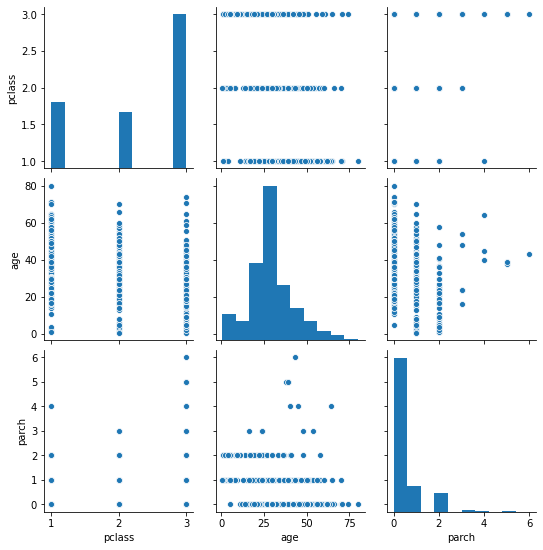

In [33]:
sns.pairplot(X_train)

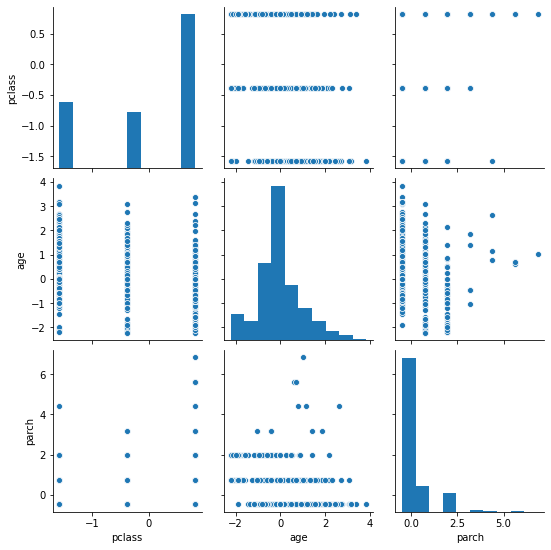

In [34]:
sns.pairplot(X_train_sc)